In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# %matplotlib inline

In [255]:
df = pd.read_csv('./winequalityN.csv')

In [256]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [257]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [258]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [259]:
df = df.dropna()
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [260]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [287]:
unique_qualities = df['quality'].unique()

number_of_wines_in_each_quality = df['quality'].value_counts()

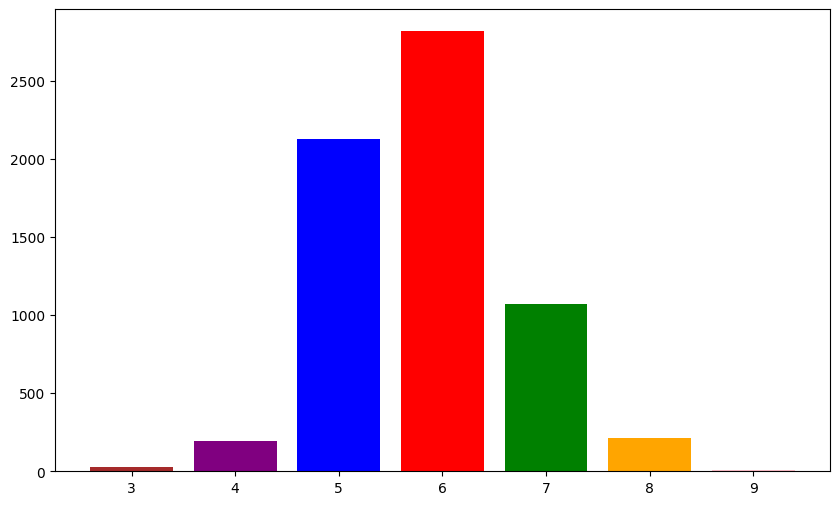

In [ ]:
plt.figure(figsize=(10, 6))

plt_colors=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

plt.bar(unique_qualities, number_of_wines_in_each_quality, color=plt_colors)

plt.show()

In [263]:
# identify outliers for each column

In [264]:
red_wines = df[df['type'] == 'red']
number_of_red_wines = red_wines.shape[0]

white_wines = df[df['type'] == 'white']
number_of_white_wines = white_wines.shape[0]

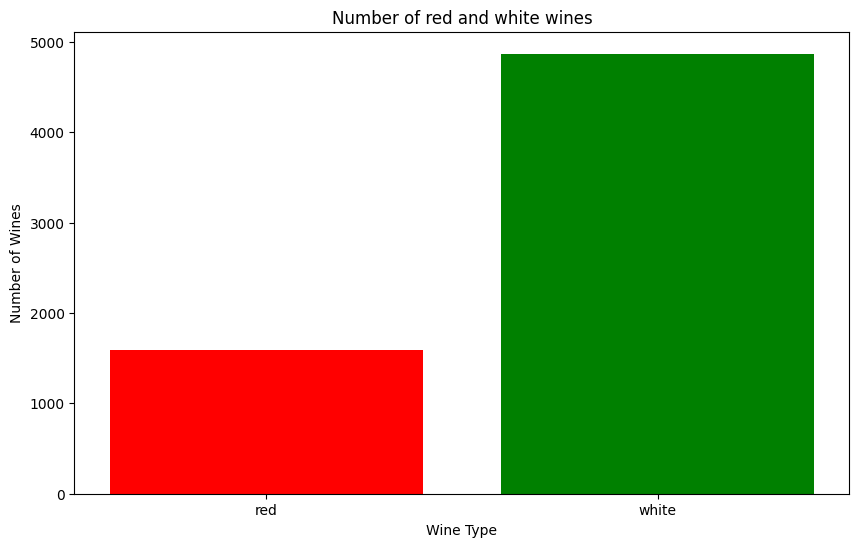

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(['red', 'white'], [number_of_red_wines, number_of_white_wines], color=['red', 'green'])

plt.title('Number of red and white wines')

plt.xlabel('Wine Type')
plt.ylabel('Number of Wines')

plt.show()


In [266]:
# white_wine_ph = white_wines['pH']
# red_wine_ph = red_wines['pH']

# plt.figure(figsize=(10, 6))
# plt.plot(red_wine_ph, marker='o')
# plt.show()


In [267]:
wine_quality = df['quality'].unique()

# count of wines with each quality value
groupped_wine = {}
wine_groupped = df.groupby('quality')

# option 1
for g in wine_groupped.groups:
    groupped_wine[g] = len(wine_groupped.groups[g])

# option 2
quality_values = df['quality'].value_counts().sort_index() 
number_of_wines_in_quality = list(quality_values)

# option 3
df.groupby('quality').size()

quality
3      30
4     214
5    2128
6    2820
7    1074
8     192
9       5
dtype: int64

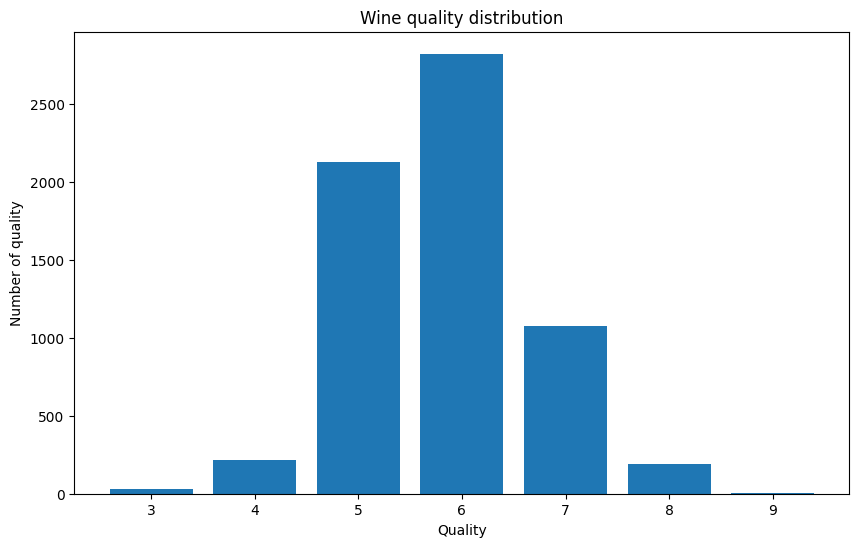

In [288]:
x = quality_values.index.tolist()                
y = quality_values.values.tolist() 

plt.figure(figsize=(10, 6))

plt.bar(x, y)

plt.title('Wine quality distribution')

plt.xlabel('Quality')
plt.ylabel('Number of quality')

plt.show()

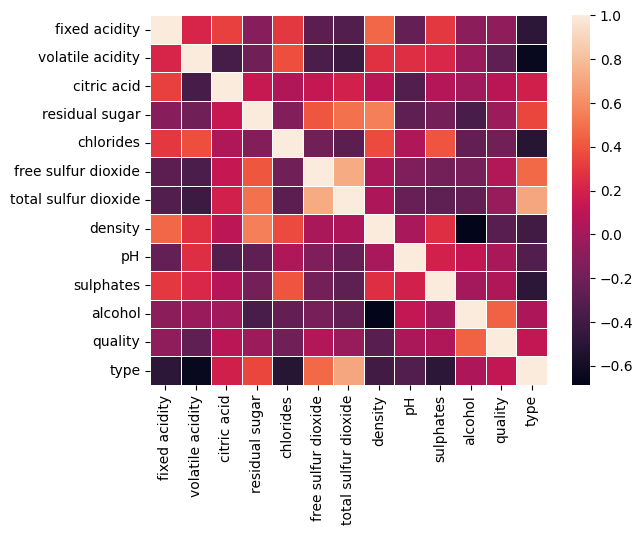

In [289]:
# Select numeric features
numeric_types = df.select_dtypes(include='number')

# create heatmap with numpy
correlation_matrix = numeric_types.corr()

# plot heatmap
ax = sns.heatmap(correlation_matrix, linewidth=0.5)

plt.show()

In [270]:
df2 = df.drop(columns=['type'])

X = df2.drop(columns=['quality'])
y = df2['quality']

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [272]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [273]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("r2: ", r2)

MSE:  0.5800752162934638
r2:  0.275837686465792


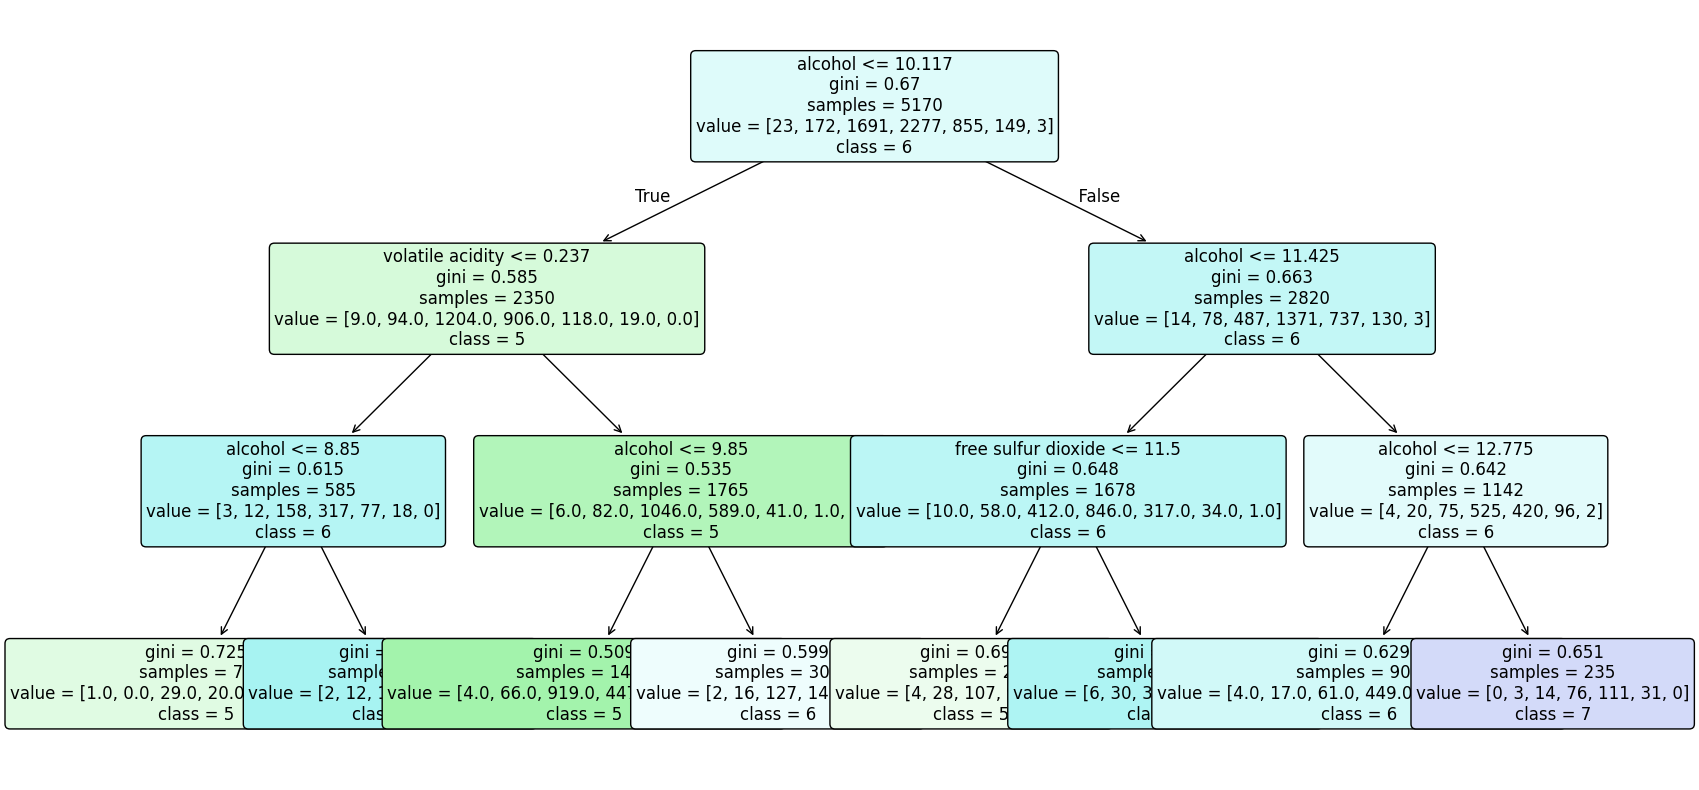

In [ ]:
plt.figure(figsize=(20,10))

plot_tree(model, feature_names=X_train.columns, class_names=[str(c) for c in model.classes_], filled=True, rounded=True, fontsize=12)

plt.show()

In [275]:
le = LabelEncoder()

wine_transformed = le.fit_transform(df['type'])

df = df.drop(columns=['type'])
df['type'] = wine_transformed

In [276]:
le.classes_

array(['red', 'white'], dtype=object)

In [277]:
X = df.drop(columns=['quality'])
y = df['quality']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [280]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("r2: ", r2)

MSE:  0.5800752162934638
r2:  0.275837686465792


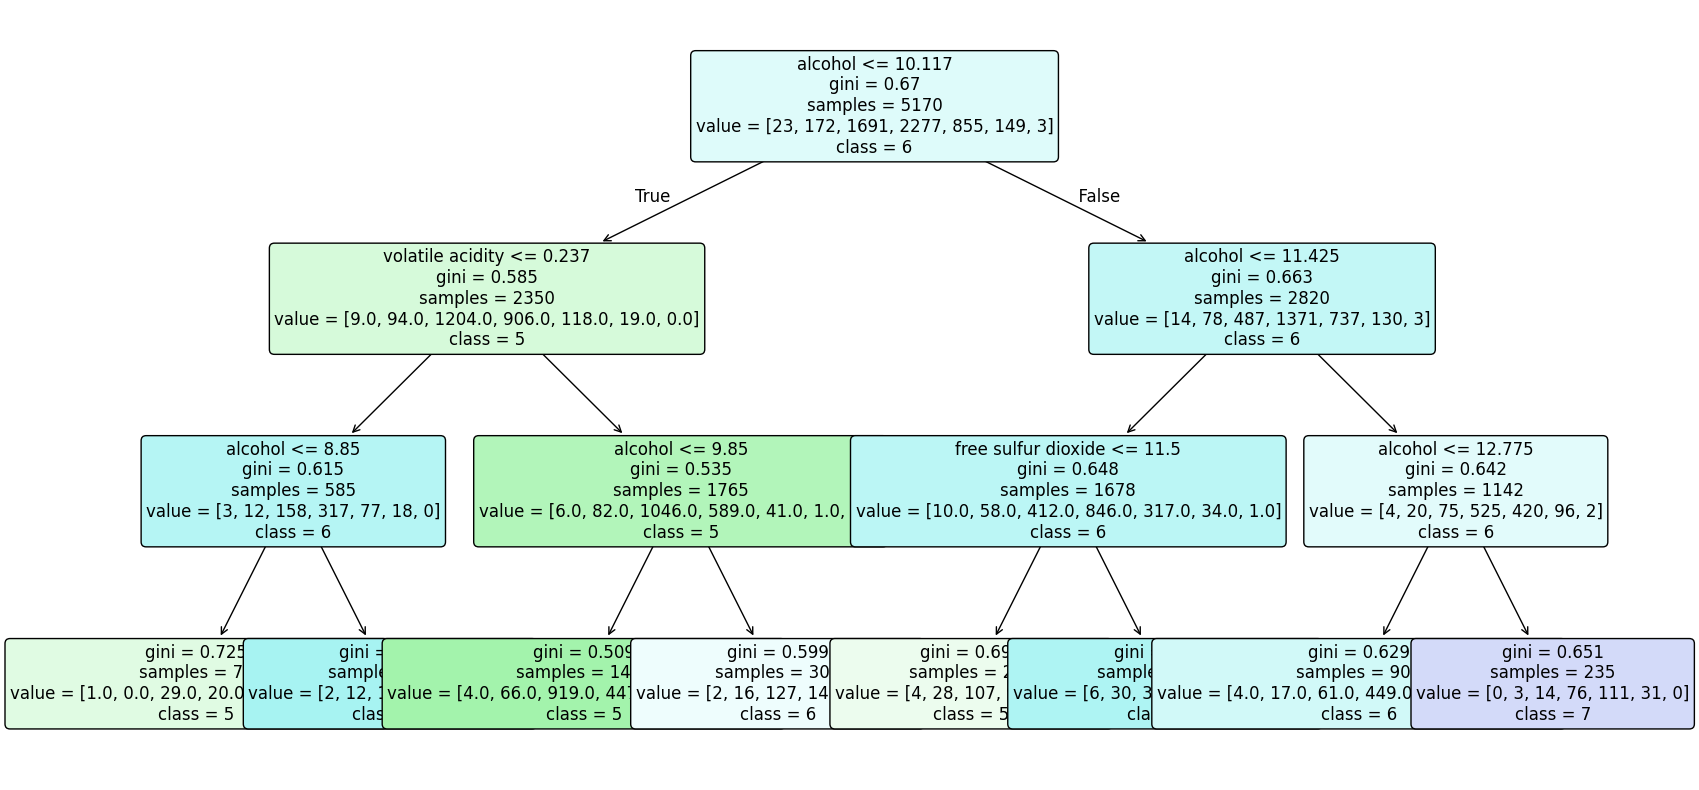

In [ ]:
plt.figure(figsize=(20,10))

plot_tree(model, feature_names=X_train.columns, class_names=[str(c) for c in model.classes_], filled=True, rounded=True, fontsize=12)

plt.show()

In [282]:
X = df.drop(columns=['quality'])
y = df['quality']

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [284]:
reg = DecisionTreeRegressor(max_depth=3, random_state=42)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [285]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("r2: ", r2)

MSE:  0.5800752162934638
r2:  0.275837686465792


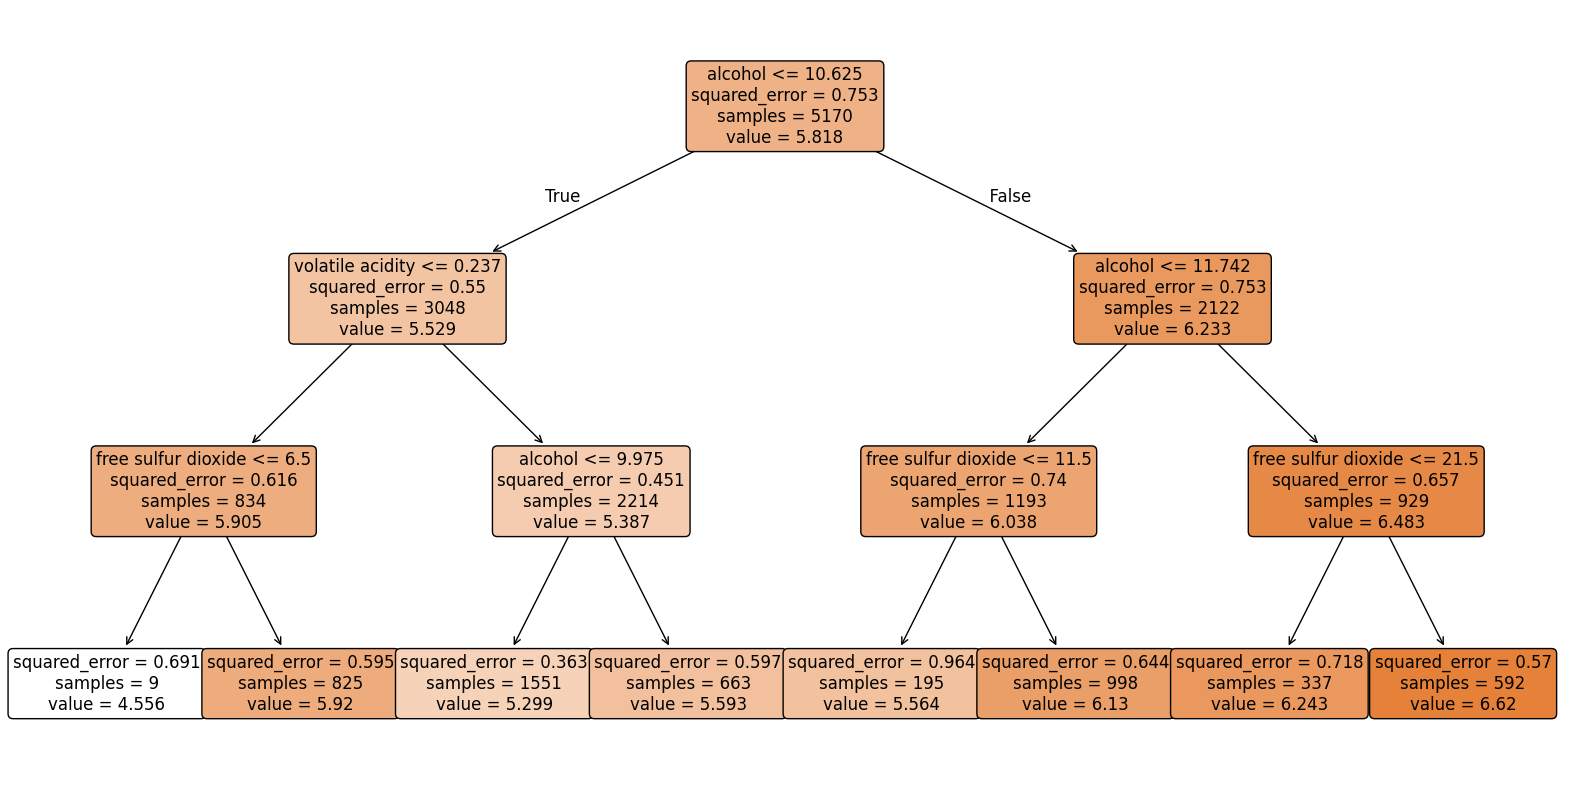

In [ ]:
plt.figure(figsize=(20,10))

plot_tree(reg, feature_names=X_train.columns, filled=True, rounded=True, fontsize=12)

plt.show()

In [ ]:
# graphviz or dtreeviz